## **A mouse is navigating a maze (represented by a reward matrix R) to reach a goal (state 9). Using Q-Learning, we train the agent to learn the optimal path from any starting point**

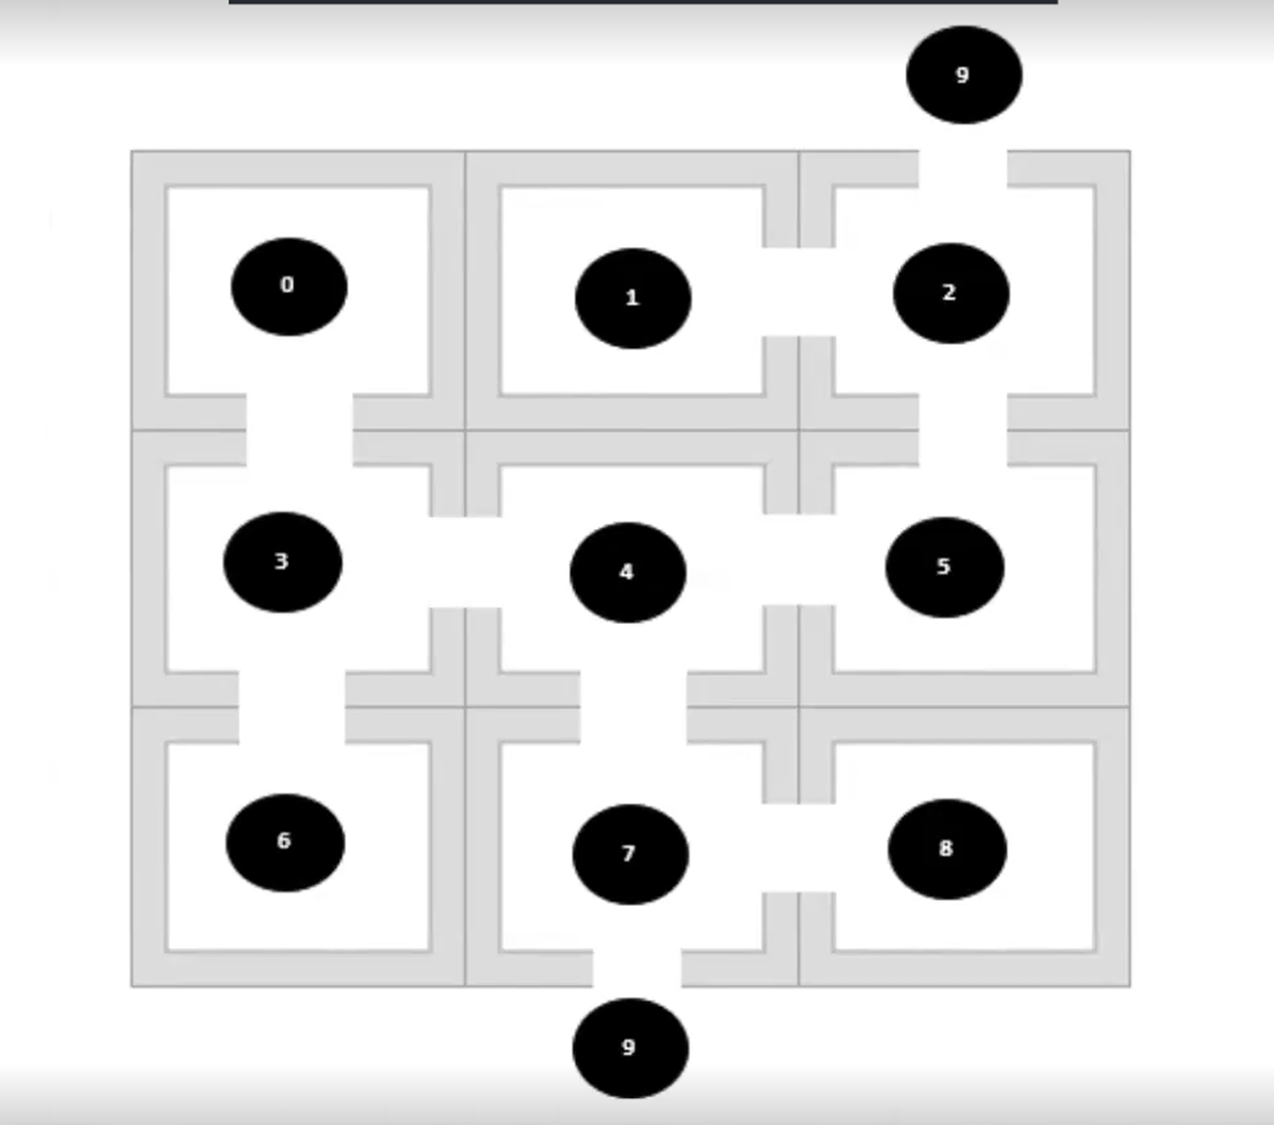

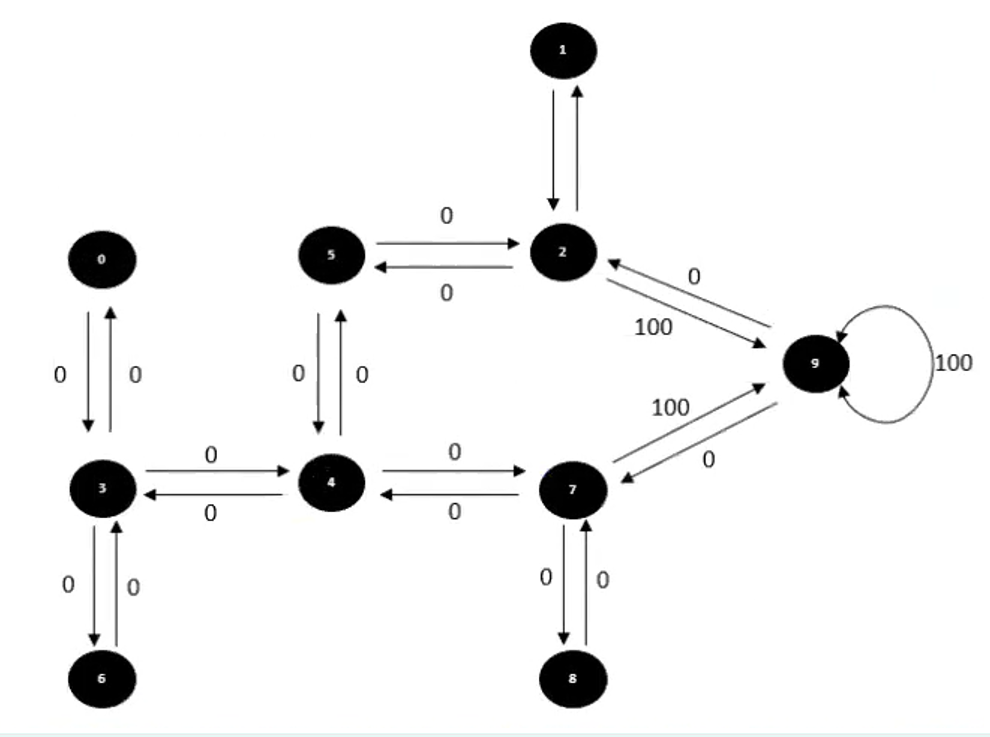

In [38]:
import numpy as np
import pandas as pd

In [39]:

# Load the reward matrix from a CSV file (already prepared)
R = pd.read_csv('mousehunt-rewardmatrix.csv', header=None)


In [40]:
# Convert it to a NumPy matrix for easier numerical operations
R = np.matrix(R)

In [41]:
# Initialize the Q-matrix with zeros. This matrix will be learned over time.
# Q[state, action] represents the expected future reward of taking 'action' from 'state'
Q = np.zeros((10, 10))

In [42]:
# Learning parameter (gamma) controls how much future rewards are valued compared to immediate rewards.
gamma = 0.7

# Initial state of the mouse (just for early testing)
initial_state = 2


In [43]:
# this code is used only for visualizing the Q- matrix
import matplotlib.pyplot as plt
import seaborn as sns

def show_q_matrix(Q):
    plt.figure(figsize=(10,6))
    sns.heatmap((Q / np.max(Q)) * 100, annot=True, cmap="YlGnBu", fmt=".1f") #normalized Q values
    plt.title("Q-Matrix Heatmap (Scaled %)")
    plt.xlabel("Action")
    plt.ylabel("State")
    plt.show()

# Example:
# show_q_matrix(Q)

In [44]:
# Function to return all available actions from the current state
def avl_actions(state):
    current_state_row = R[state,]                 # Get the row of rewards for the current state
    av_act = np.where(current_state_row > -1)[1]  # Find indices where action is allowed (> -1)
    return av_act



In [45]:
# Testing

a_actions = avl_actions(initial_state)

In [46]:
a_actions

array([1, 5, 9])

In [47]:
# Randomly choose one action from available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_actions_range, 1))
    return next_action



In [48]:
#Testing

action = sample_next_action(a_actions)

/tmp/ipython-input-47-831023857.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))


In [49]:
action

1

In [50]:
Q

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [51]:
# np.where(Q[action,] == np.max(Q[action,]))

In [52]:
# x= np.where(Q[action,] == np.max(Q[action,]))[0]

In [53]:
# x.shape

In [54]:
# Q-learning update rule implementation
def update(current_state, action, gamma):
    # Find max Q-value for the next state (action becomes the next state in Q matrix)
    max_index = np.where(Q[action,] == np.max(Q[action,]))[0]  # its return a tuple of list ,to get the list we use [0]

    # If multiple actions have the same max value, pick one randomly
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, 1))
    else:
        max_index = int(max_index)  # Ensure it's an int, not array

    # Get the max future reward value
    max_value = Q[action, max_index]

    # Q-learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value



In [55]:
# update(2,9,0.7)

In [56]:
Q

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

/tmp/ipython-input-47-831023857.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))
/tmp/ipython-input-54-2964660539.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, 1))
/tmp/ipython-input-54-2964660539.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)  # Ensure it's an int, not array



Q-matrix after 200 iterations:



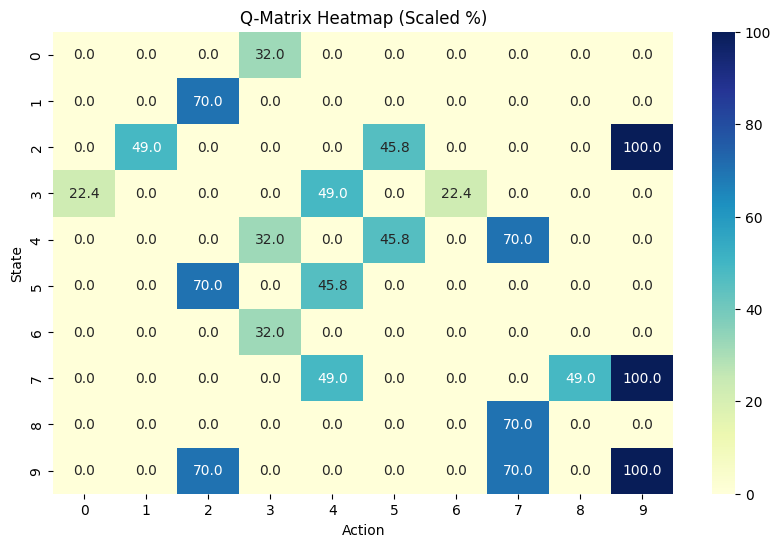

/tmp/ipython-input-47-831023857.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))
/tmp/ipython-input-54-2964660539.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)  # Ensure it's an int, not array



Q-matrix after 400 iterations:



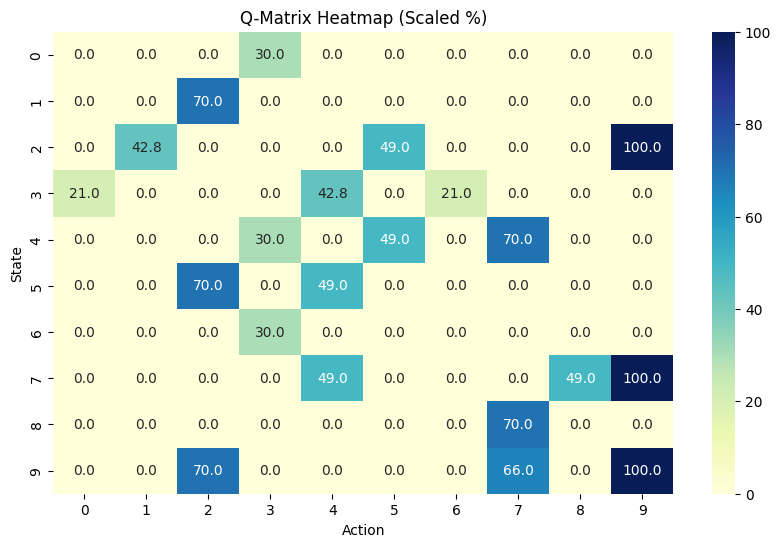

/tmp/ipython-input-47-831023857.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))
/tmp/ipython-input-54-2964660539.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)  # Ensure it's an int, not array



Q-matrix after 600 iterations:



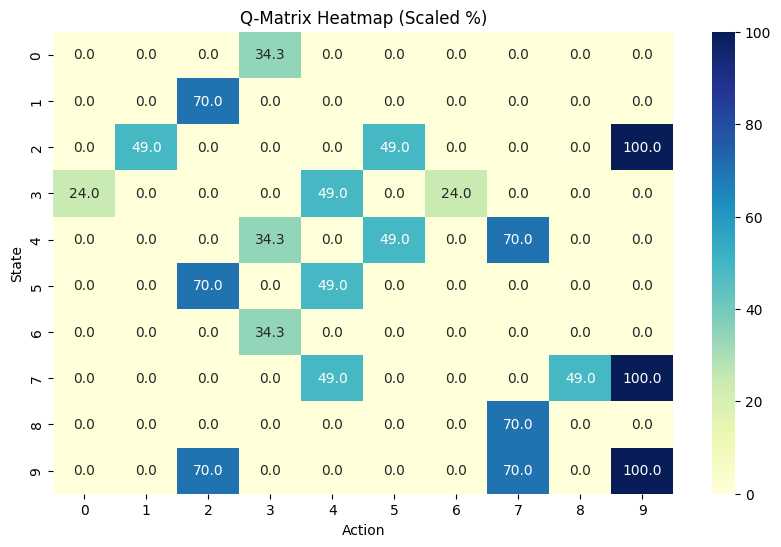

/tmp/ipython-input-47-831023857.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))
/tmp/ipython-input-54-2964660539.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)  # Ensure it's an int, not array



Q-matrix after 800 iterations:



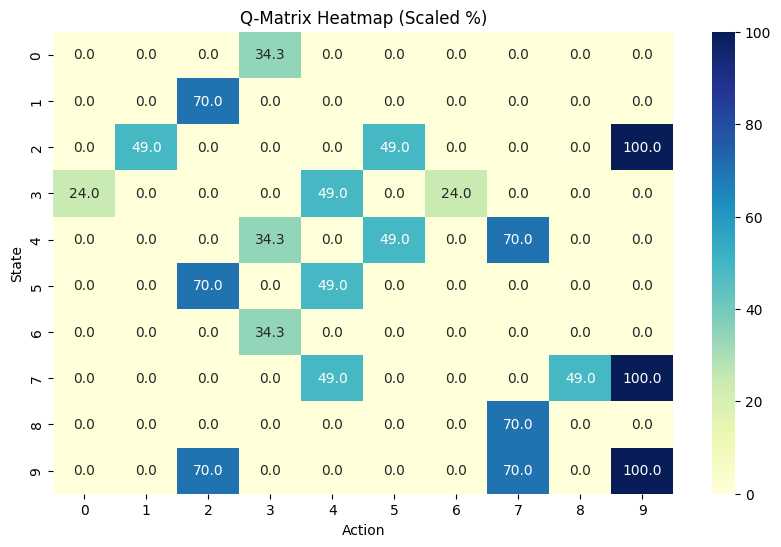

/tmp/ipython-input-47-831023857.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))
/tmp/ipython-input-54-2964660539.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)  # Ensure it's an int, not array



Q-matrix after 1000 iterations:



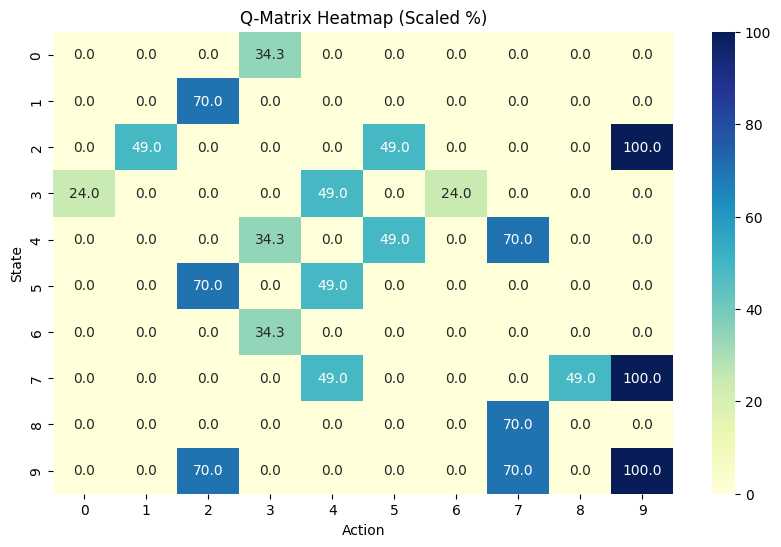

In [57]:

# ------------ Training Loop ------------
# Loop over many episodes to allow learning
for i in range(1000):
    current_state = np.random.choice(range(10))        # Choose a random starting state
    available_act = avl_actions(current_state)         # Find valid actions from this state
    action = sample_next_action(available_act)         # Pick one randomly
    update(current_state, action, gamma)               # Update the Q-matrix

    # Optional: show progress every 200 iterations
    if (i+1) % 200 == 0:
        print(f"\nQ-matrix after {i+1} iterations:\n")
        # print(np.round((Q / np.max(Q)) * 100, 2))  # Normalize and scale for readability
        show_q_matrix(Q)



In [ ]:
# Testing process:

# Drop the mouse at some random stat_result

# fetch the next best step from the Q-matrix

# if there are multiple next best step choose one randomly

# save the next step index in the output list

# update the current step

# loop this until the current state is 9 i.e. exit

In [58]:
# ------------ Testing the Learned Policy ------------

# Let's test the Q-matrix by finding the optimal path from a given state
current_state = 4
steps = [current_state]

In [59]:
# Keep moving to the best next state until goal (state 9) is reached
while current_state != 9:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[0]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("\nOptimal path to goal from state 5:")
print(steps)



Optimal path to goal from state 5:
[4, 7, 9]


/tmp/ipython-input-59-3199462437.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)
